# Higgs Challenge Example using Neural Networks
In this part we continue to work with the data from the **[Higgs Boson ML Challenge][1]** on Kaggle and present solutions using neural networks (NN). 

It is based on [HiggsChallenge-NN.ipynb.ipynb from LMU course][2]



[1]: https://www.kaggle.com/c/Higgs-boson
[2]: https://github.com/fuenfundachtzig/LMU_DA_ML/blob/master/HiggsChallenge-NN.ipynb
[3]: NN_Activation.ipynb

## Neural Networks to discover the Higgs

Now let's start trying to apply a NN to the Higgs Challenge data. We will start using Scikit Learn, and then try **[Keras](https://keras.io/)**.

### Load the data and preprocessing

In [1]:
# the usual setup: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
import urllib

In [3]:
path = Path("atlas-higgs-challenge-2014-v2.csv.gz")

def prepare_data(path):
    if path.exists():
        return
    url = "http://opendata.cern.ch/record/328/files/atlas-higgs-challenge-2014-v2.csv.gz"
    path_prev_tutorial = Path("../05-validation-and-metrics") / path
    if path_prev_tutorial.exists():
        path.symlink_to(path_prev_tutorial)
    if not path.exists():
        urllib.request.urlretrieve(url, path)

prepare_data(path)

df = pd.read_csv(path)

In [5]:
df

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,...,2.150,0.444,46.062,1.240,-2.475,113.497,0.000814,s,t,0.002653
1,100001,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,...,0.725,1.158,-999.000,-999.000,-999.000,46.226,0.681042,b,t,2.233584
2,100002,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,...,2.053,-2.028,-999.000,-999.000,-999.000,44.251,0.715742,b,t,2.347389
3,100003,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,...,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,1.660654,b,t,5.446378
4,100004,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,...,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,1.904263,b,t,6.245333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818233,918233,105.668,46.443,60.048,156.191,0.403,47.746,0.936,1.279,6.133,...,1.190,-0.766,41.791,0.787,-1.090,154.056,0.005721,s,u,0.259892
818234,918234,99.294,30.097,62.713,65.861,3.312,471.319,-2.611,2.294,2.889,...,1.293,-0.868,70.158,-2.018,2.893,178.856,0.000461,s,u,0.020956
818235,918235,108.497,9.837,65.149,18.006,-999.000,-999.000,-999.000,2.742,18.006,...,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,1.189365,b,u,53.284258
818236,918236,96.711,20.006,66.942,29.761,-999.000,-999.000,-999.000,2.479,2.739,...,1.460,2.637,-999.000,-999.000,-999.000,30.863,0.512740,b,u,22.971060


In [4]:
n_sig_tot = df["Weight"][df.Label == "s"].sum()
n_bkg_tot = df["Weight"][df.Label == "b"].sum()
# comment this out if you want to run on the full dataset
df = df.sample(frac=0.3)

In [6]:
# map y values to integers
df['Label'] = df['Label'].map({'b':0, 's':1})

In [7]:
# let's create separate arrays
X = df.loc[:,'DER_mass_MMC':'PRI_jet_all_pt']
columns = list(X.columns)
X = X.to_numpy()
y = df['Label'].to_numpy()
weight = df['Weight'].to_numpy()

In [9]:
#now split into testing and training samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, weight_train, weight_test = train_test_split(
    X, y, weight, test_size=0.33, random_state=42)

# Neural networks (**M**ulti**L**ayer **P**erceptrons - MLP) in sklearn

Let's first look at the [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [10]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(verbose=True, early_stopping=True, max_iter=40)

In [11]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': True,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 40,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}

In [12]:
%%time
mlp.fit(X_train, y_train)

Iteration 1, loss = 1.17767190
Validation score: 0.747346
Iteration 2, loss = 0.77998978
Validation score: 0.690143
Iteration 3, loss = 0.75323754
Validation score: 0.752198
Iteration 4, loss = 0.71669513
Validation score: 0.775127
Iteration 5, loss = 0.69808621
Validation score: 0.779979
Iteration 6, loss = 0.64633053
Validation score: 0.796560
Iteration 7, loss = 0.62774148
Validation score: 0.772555
Iteration 8, loss = 0.60103200
Validation score: 0.751924
Iteration 9, loss = 0.58296101
Validation score: 0.786710
Iteration 10, loss = 0.56505406
Validation score: 0.741144
Iteration 11, loss = 0.53594191
Validation score: 0.794681
Iteration 12, loss = 0.52062611
Validation score: 0.812283
Iteration 13, loss = 0.50655351
Validation score: 0.810788
Iteration 14, loss = 0.49830085
Validation score: 0.816424
Iteration 15, loss = 0.49088957
Validation score: 0.774780
Iteration 16, loss = 0.48396862
Validation score: 0.811499
Iteration 17, loss = 0.46894106
Validation score: 0.817938
Iterat

MLPClassifier(early_stopping=True, max_iter=40, verbose=True)

In [13]:
mlp.score(X_test, y_test)

0.821845870105437

We will again use the [approximate median significance][1] from the Kaggle competition to determine how good a solution was. Note that if you do not use the full data set (i.e. you split into training and testing) you have to reweigh the inputs so that the subsample yield matches to the total yield, which we will do below.

[1]: AMS.ipynb

In [14]:
# load function to compute approximate median significance (AMS)
from mltools import ams

In [15]:
# Determine probability scores
y_train_prob = mlp.predict_proba(X_train)[:, 1]
y_test_prob = mlp.predict_proba(X_test)[:, 1]

In [16]:
# add the probability to the original data frame
df['Prob']=mlp.predict_proba(X)[:, 1]

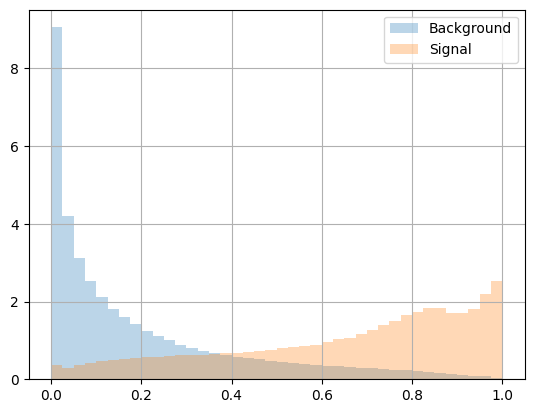

In [17]:
from mltools import plot_proba
plot_proba(df, mlp, X )

In [18]:
# calculate the total weights (yields)
#sigall  = weight[y==1].sum()
#backall = weight[y==0].sum()
# need to use numbers for full sample
sigall,backall = n_sig_tot, n_bkg_tot

(691.9886077119882, 410999.847321811)

Train Maximum AMS 2.862 for pcut 0.751
Test Maximum AMS 2.830 for pcut 0.754


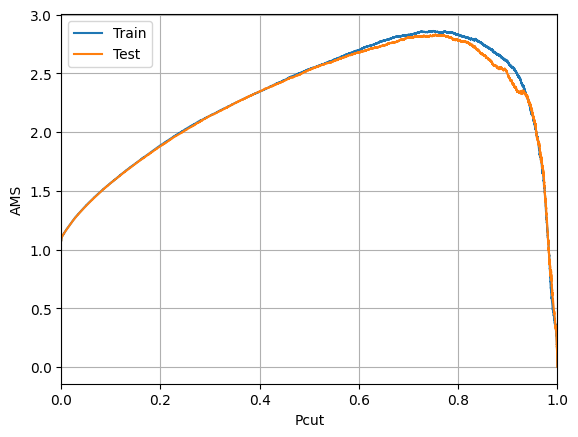

In [19]:
from mltools import ams_scan
label='Train'
pcutv,amsv = ams_scan(y_train, y_train_prob, weight_train, sigall, backall)

# calculate size and pcut of ams maximum
pcutmax,amsmax = pcutv[np.argmax(amsv)] , amsv.max()
print(f"{label} Maximum AMS {amsmax:.3f} for pcut {pcutmax:.3f}")
plt.plot(pcutv,amsv,label=label)
label='Test'
pcutv,amsv = ams_scan(y_test, y_test_prob, weight_test, sigall, backall)

# calculate size and pcut of ams maximum
pcutmax,amsmax = pcutv[np.argmax(amsv)] , amsv.max()
print(f"{label} Maximum AMS {amsmax:.3f} for pcut {pcutmax:.3f}")
plt.plot(pcutv,amsv,label=label)
plt.xlim(0., 1.)
plt.grid()
plt.xlabel('Pcut')
plt.ylabel('AMS')
plt.legend();

How did we do? Worse than the BDT from 
[higgs_challenge.ipynb](../05-validation-and-metrics/higgs_challenge.ipynb)

![Comparison with submissions](figures/tr150908_davidRousseau_TMVAFuture_HiggsML.001.png)

## Rescaling
Neural networks are quite sensitive to feature scaling, so let's try to scale the features.

And set missing values to 0 before.

In [20]:
X_train[X_train == -999] = 0
X_test[X_test == -999] = 0

In [22]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

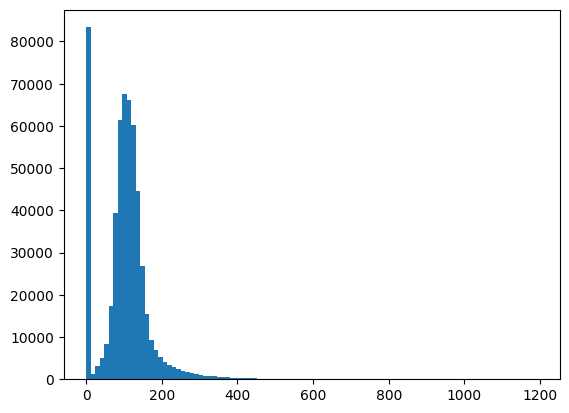

In [23]:
plt.hist(X_train[:, columns.index("DER_mass_MMC")], bins=100);

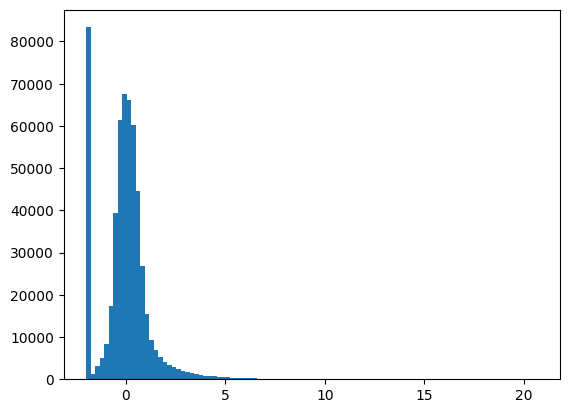

In [24]:
plt.hist(X_train_scaled[:, columns.index("DER_mass_MMC")], bins=100);

Train a new network using the rescaled features:

In [25]:
mlp_scaled = MLPClassifier(verbose=True, early_stopping=True, max_iter=40)
mlp_scaled.fit(X_train_scaled, y_train)

Iteration 1, loss = 0.40309352
Validation score: 0.829776
Iteration 2, loss = 0.37384631
Validation score: 0.836471
Iteration 3, loss = 0.36663378
Validation score: 0.837985
Iteration 4, loss = 0.36295324
Validation score: 0.840393
Iteration 5, loss = 0.36087840
Validation score: 0.837474
Iteration 6, loss = 0.35912727
Validation score: 0.841140
Iteration 7, loss = 0.35803204
Validation score: 0.840046
Iteration 8, loss = 0.35691991
Validation score: 0.839681
Iteration 9, loss = 0.35627431
Validation score: 0.841195
Iteration 10, loss = 0.35547150
Validation score: 0.840739
Iteration 11, loss = 0.35498483
Validation score: 0.841487
Iteration 12, loss = 0.35466661
Validation score: 0.841542
Iteration 13, loss = 0.35402780
Validation score: 0.842326
Iteration 14, loss = 0.35371578
Validation score: 0.842892
Iteration 15, loss = 0.35340796
Validation score: 0.841268
Iteration 16, loss = 0.35290813
Validation score: 0.840940
Iteration 17, loss = 0.35260176
Validation score: 0.842107
Iterat

MLPClassifier(early_stopping=True, max_iter=40, verbose=True)

In [26]:
mlp_scaled.score(X_test_scaled, y_test)

0.8416815113010566

In [27]:
mlp_scaled.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': True,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 40,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}

In [28]:
# Determine probability scores
y_train_prob_scaled = mlp_scaled.predict_proba(X_train_scaled)[:, 1]
y_test_prob_scaled = mlp_scaled.predict_proba(X_test_scaled)[:, 1]

Train Maximum AMS 3.564 for pcut 0.819
Test Maximum AMS 3.488 for pcut 0.839


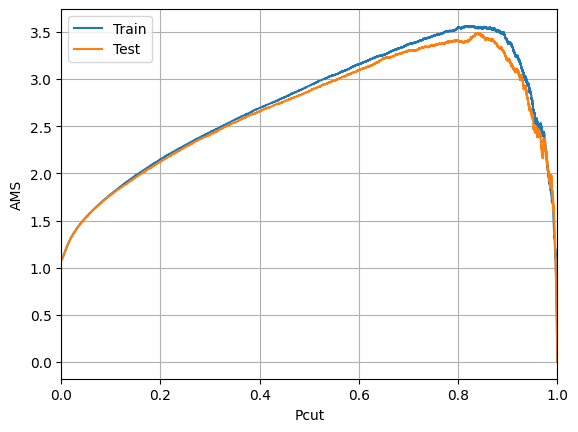

In [29]:
from mltools import ams_scan
label='Train'
pcutv,amsv = ams_scan(y_train, y_train_prob_scaled, weight_train, sigall, backall)
# calculate size and pcut of ams maximum
pcutmax,amsmax = pcutv[np.argmax(amsv)] , amsv.max()
print(f"{label} Maximum AMS {amsmax:.3f} for pcut {pcutmax:.3f}")
plt.plot(pcutv,amsv,label=label)
label='Test'
pcutv,amsv = ams_scan(y_test, y_test_prob_scaled, weight_test, sigall, backall)
# calculate size and pcut of ams maximum
pcutmax,amsmax = pcutv[np.argmax(amsv)] , amsv.max()
print(f"{label} Maximum AMS {amsmax:.3f} for pcut {pcutmax:.3f}")
plt.plot(pcutv,amsv,label=label)
plt.xlim(0., 1.)
plt.grid()
plt.xlabel('Pcut')
plt.ylabel('AMS')
plt.legend();

We improved quite a bit by using the same classifier but with rescaled data!

<div class="alert alert-block alert-success">
    <h2>Exercise 1</h2>
    Check documentation of the MLPClassifier (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) and vary the structure of the network (number of hidden layers, number of neurons)
</div>

In [30]:
MLPClassifier?

Init signature:
MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    *,
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
    max_fun=15000,
)
Docstring:     
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden laye

# Neutral networks with Keras
SciKit Learn has simple NNs, but if you want to do deep NNs, or train on GPUs, you probably want to use something like [Keras](https://keras.io/getting_started/) instead. 

Let's try to create a simple NN, similar to the one sklearn gave us using Keras.

In [33]:
np.random.seed(1337)  # for reproducibility

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [34]:
from tensorflow.keras import regularizers

model = Sequential([
    Dense(units=100, activation="relu", input_shape=X_train.shape[1:], kernel_regularizer=regularizers.l2(0.0001), use_bias=True),
    Dense(units=1, activation="sigmoid")
])

C:\Users\maxge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


* `Dense`: "Just your regular densely-connected NN layer."
  * implements the operation: output = activation(dot(input, kernel) + bias)
    * kernel is a weights matrix created by the layer
    * bias is a bias vector created by the layer (only applicable if `use_bias` is True)
  * `units`: dimensionality of the output array (note: we do not need to specify to size of the input array, except...)
  * `input_shape`: expected shape of the input arrays (...only needed for the first layer)
  * `activation`: element-wise activation function
  * `kernel_regularizer`: constraint function applied to the kernel weights matrix (see [regularizers][2])
  
  
[1]: https://keras.io/constraints/
[2]: https://keras.io/api/layers/regularizers/

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         3,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

* `optimizer`: name of optimizer or optimizer instance. See [optimizers][1].
  * _Adam_: an algorithm for first-order gradient-based optimization of stochastic objective functions, based on adaptive estimates of lower-order moments ([paper][2], a short [summary][4])
* `loss`: name of objective function or objective function. See [losses][3].
  * _binary crossentropy_: 
    $$H_p(q) = -\frac{1}{N}\sum_{i=1}^N [{y_i} \log(\hat{y}_i)+(1-y_i) \log(1-\hat{y}_i)]$$
    * a measure of dissimilarity, used here to define the loss function that should be minimized: 
    
        "The cross entropy between two probability distributions p and q over the same underlying set of events measures the average number of bits needed to identify an event drawn from the set if a coding scheme used for the set is optimized for an estimated probability distribution q, rather than the true distribution p."
        
        (The minimum number of bits to encode an independent event that occurs with probability $y_i$ is $-\log_2(y)$.)
   * here the true labels are $y_i=1$ for the positive class and $y_i=0$ for the negative class
   * the estimated probabilities are $\hat y_{i}$
   * $N$ runs over all samples
* `metrics`: list of metrics to be evaluated by the model during training and testing (typically accuracy)

[1]: https://keras.io/optimizers/
[2]: https://arxiv.org/abs/1412.6980v8
[3]: https://keras.io/losses/
[4]: https://medium.com/@nishantnikhil/adam-optimizer-notes-ddac4fd7218
[5]: https://datascience.stackexchange.com/questions/9302/the-cross-entropy-error-function-in-neural-networks

In [37]:
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=200, validation_split=0.1)

Epoch 1/10
2467/2467 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7890 - loss: 0.4492 - val_accuracy: 0.8332 - val_loss: 0.3844
Epoch 2/10
2467/2467 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8326 - loss: 0.3822 - val_accuracy: 0.8376 - val_loss: 0.3745
Epoch 3/10
2467/2467 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8363 - loss: 0.3742 - val_accuracy: 0.8400 - val_loss: 0.3698
Epoch 4/10
2467/2467 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8385 - loss: 0.3696 - val_accuracy: 0.8404 - val_loss: 0.3666
Epoch 5/10
2467/2467 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8394 - loss: 0.3676 - val_accuracy: 0.8410 - val_loss: 0.3649
Epoch 6/10
2467/2467 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8397 - loss: 0.3659 - val_accuracy: 0.8420 - val_loss: 0.3622
Epoch 7/10
2467/2467 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8406 - loss: 0.3641 - val_accuracy: 0.8422 - val_loss: 0.3622
Epoch 8/10
2467/2467 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8408 - loss: 0.3636 - 

* `batch_size`: number of samples per gradient update
* `epochs`: number of epochs to train the model. An epoch is an iteration over the entire training dataset provided. 

[Further discussion...](https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/)

In [38]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

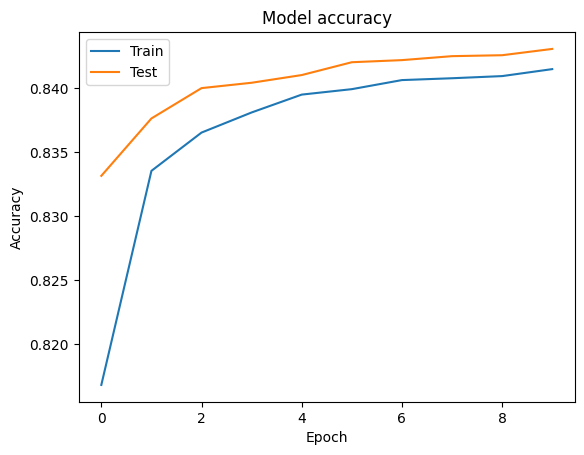

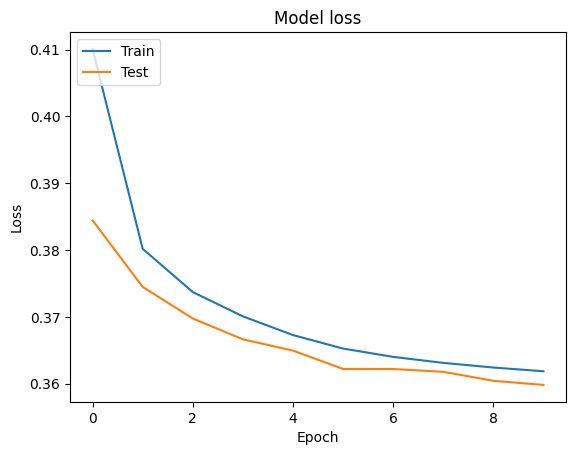

In [39]:
# visualize training history returned by model.fit

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

The `.predict` method will give us the output

In [40]:
y_train_prob_keras = model.predict(X_train_scaled)[:, 0]

17132/17132 ━━━━━━━━━━━━━━━━━━━━ 17s 979us/step


Alternatively we can treat keras models like functions (note this will return tensorflow tensors which you might want to convert to numpy). When data fits into memory this is often fastest

In [41]:
y_train_prob_keras = model(X_train_scaled).numpy()
y_test_prob_keras = model(X_test_scaled).numpy()

Train Maximum AMS 3.503 for pcut 0.806
Test Maximum AMS 3.404 for pcut 0.820


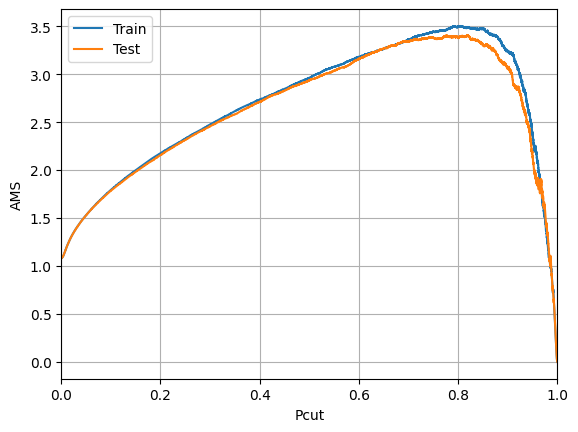

In [42]:
from mltools import ams_scan
label='Train'
pcutv,amsv = ams_scan(y_train, y_train_prob_keras, weight_train, sigall, backall)
# calculate size and pcut of ams maximum
pcutmax,amsmax = pcutv[np.argmax(amsv)] , amsv.max()
print(f"{label} Maximum AMS {amsmax:.3f} for pcut {pcutmax:.3f}")
plt.plot(pcutv,amsv,label=label)
label='Test'
pcutv,amsv = ams_scan(y_test, y_test_prob_keras, weight_test, sigall, backall)
# calculate size and pcut of ams maximum
pcutmax,amsmax = pcutv[np.argmax(amsv)] , amsv.max()
print(f"{label} Maximum AMS {amsmax:.3f} for pcut {pcutmax:.3f}")
plt.plot(pcutv,amsv,label=label)
plt.xlim(0., 1.)
plt.grid()
plt.xlabel('Pcut')
plt.ylabel('AMS')
plt.legend();

We only made a single layer NN in Keras. However, you can easily change the structure of the network. As an assignment, try adding an extra hidden layer and changing the number of neurons.

<div class="alert alert-block alert-success">
    <h2>Exercise 2</h2>
    We only made a single layer NN in Keras. However, you can easily change the structure of the network. Try adding an extra hidden layer and changing the number of neurons.
</div>    
<div class="alert alert-block alert-success">
    <h3>Further variations:</h3>
    - Vary the activation.
    - Vary the regularization. May have to do this as the structure changes.
    - Try using derivied variables only or primary variables only.

</div>